<a href="https://colab.research.google.com/github/MustafaYassinM/Data_science_projects/blob/main/Market_Segmentation(Project).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv ('/content/drive/MyDrive/Customers.csv')

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.drop('CustomerID', axis = 1,inplace =True)

# For easy access to different columns, I will simplify their names

In [6]:
df.rename (columns = {'Annual Income (k$)' : 'Annual Income', 'Spending Score (1-100)' : 'Spending Score'} , inplace = True)
df. head()

,Gender,Age,Annual Income,Spending Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Gender          200 non-null    object
 1   Age             200 non-null    int64 
 2   Annual Income   200 non-null    int64 
 3   Spending Score  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [8]:
df.describe ()

,Age,Annual Income,Spending Score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


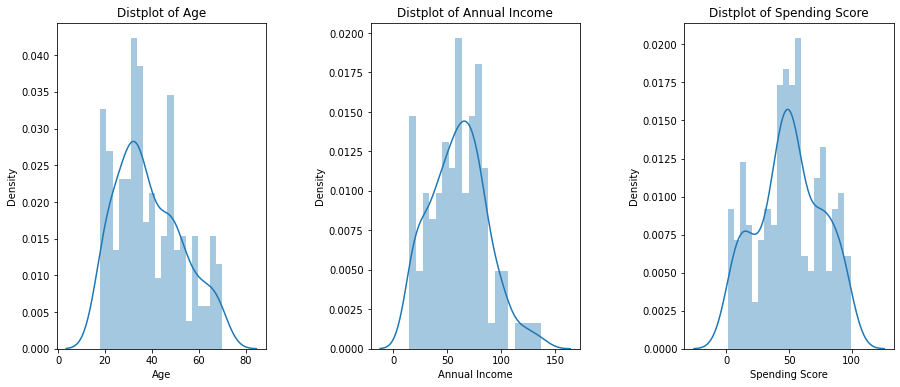

In [9]:
plt.figure(1, figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Annual Income' , 'Spending Score']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

In [10]:
df1 = df.copy()

In [11]:
df1['Age_log'] = np.log(df['Age'])
df1['Annual_Income_log'] = np.log(df['Annual Income'])
df1['Spending_Score_log'] = np.log(df['Spending Score'])
df1.head()

,Gender,Age,Annual Income,Spending Score,Age_log,Annual_Income_log,Spending_Score_log
0,Male,19,15,39,2.944439,2.708050,3.663562
1,Male,21,15,81,3.044522,2.708050,4.394449
2,Female,20,16,6,2.995732,2.772589,1.791759
3,Female,23,16,77,3.135494,2.772589,4.343805
4,Female,31,17,40,3.433987,2.833213,3.688879


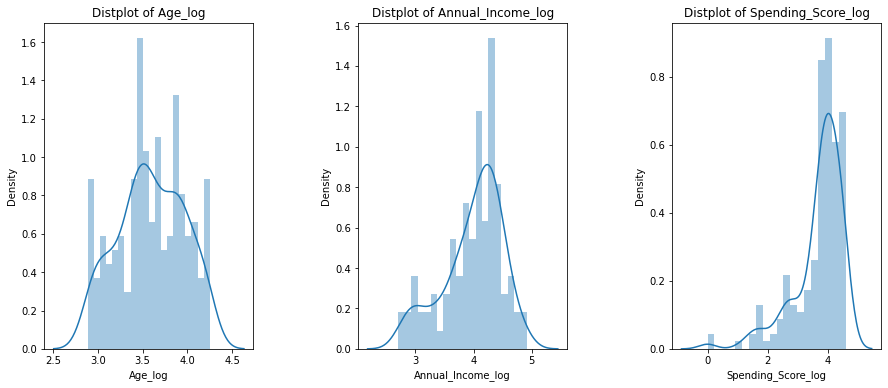

In [12]:
plt.figure(1, figsize = (15 , 6))
n = 0 
for x in ['Age_log' , 'Annual_Income_log' , 'Spending_Score_log']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df1[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

Logging doesn't perform very well, especially with **Spending Score** it performes poorly. Hence we will continue with our original dataset,,

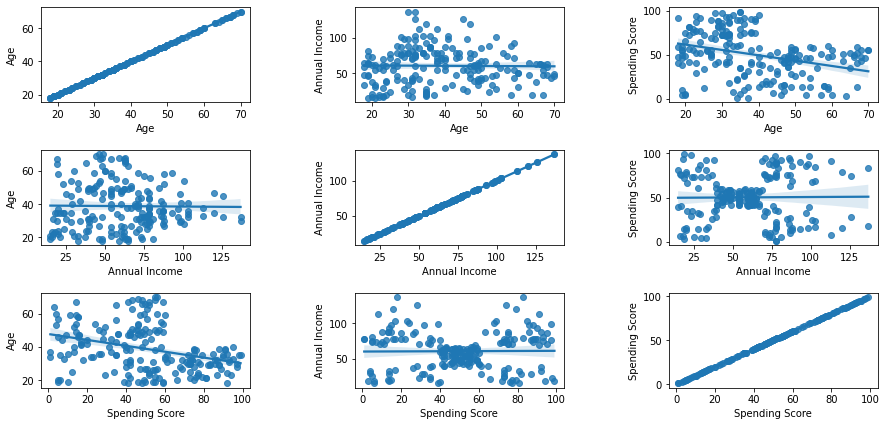

In [13]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['Age' , 'Annual Income' , 'Spending Score']:
    for y in ['Age' , 'Annual Income' , 'Spending Score']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df)

Checking for possible linera relationships:

In [14]:
df.Age.describe()

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64

In [15]:
bins = [17,31,50, 71] 
labels = ['Young','Mature','Old'] 
df['Age_Seg'] =pd.cut (df.Age,bins,labels =labels) 
df['Age_Seg'].head()

0    Young
1    Young
2    Young
3    Young
4    Young
Name: Age_Seg, dtype: category
Categories (3, object): ['Young' < 'Mature' < 'Old']

Divide our sample by Age into 3 categories, Hoping we will notice some pattern of spending based on sample's **Age**

In [16]:
df[['Age', 'Age_Seg']].sample(10)

,Age,Age_Seg
112,38,Mature
70,70,Old
198,32,Mature
180,37,Mature
165,36,Mature
13,24,Young
168,36,Mature
93,40,Mature
131,39,Mature
7,23,Young


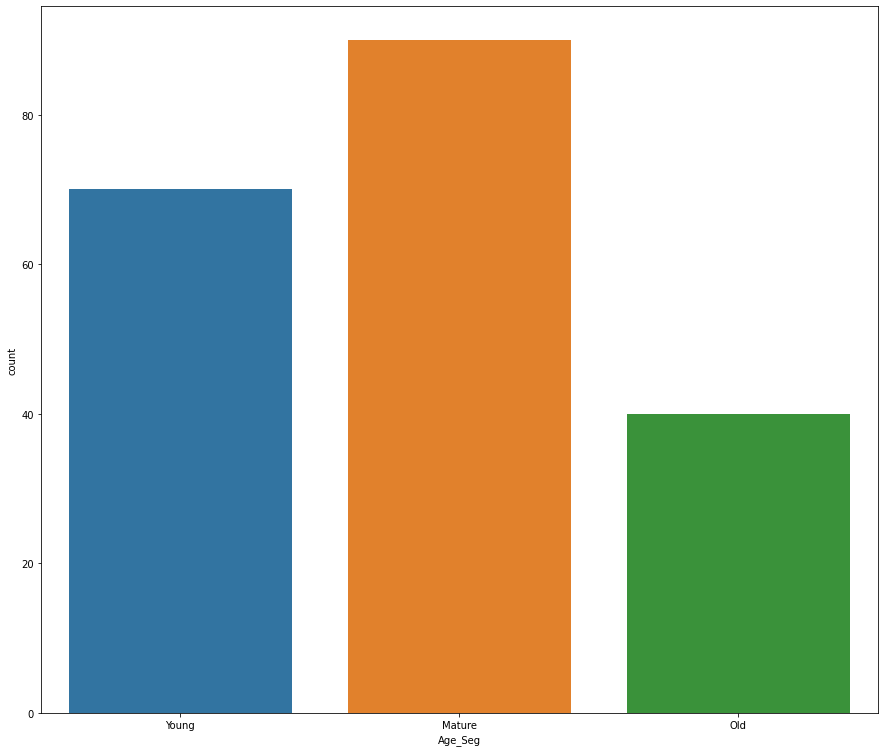

In [18]:
plt.figure(figsize=(15,13))
sns.countplot (df. Age_Seg)

Most of our samples are matures and youngs, let's see the impliction of that on their spending behaviors.

In [19]:
df['Spending Score'].describe()

count    200.000000
mean      50.200000
std       25.823522
min        1.000000
25%       34.750000
50%       50.000000
75%       73.000000
max       99.000000
Name: Spending Score, dtype: float64

In [20]:
bins=[0,35,50,99]
#cut(df['A'], bins=[0, 2, 8, 10], include_lowest=True, labels=['low', 'mid', 'high'])
labels = ['low','moderate','high'] 
df['Spending_Seg'] = pd.cut(df['Spending Score' ] , bins, labels = labels)


Now we divide spending score to compare it with Age segments.

In [21]:
df.Spending_Seg.isna().sum ()

0

<Figure size 1080x936 with 0 Axes>

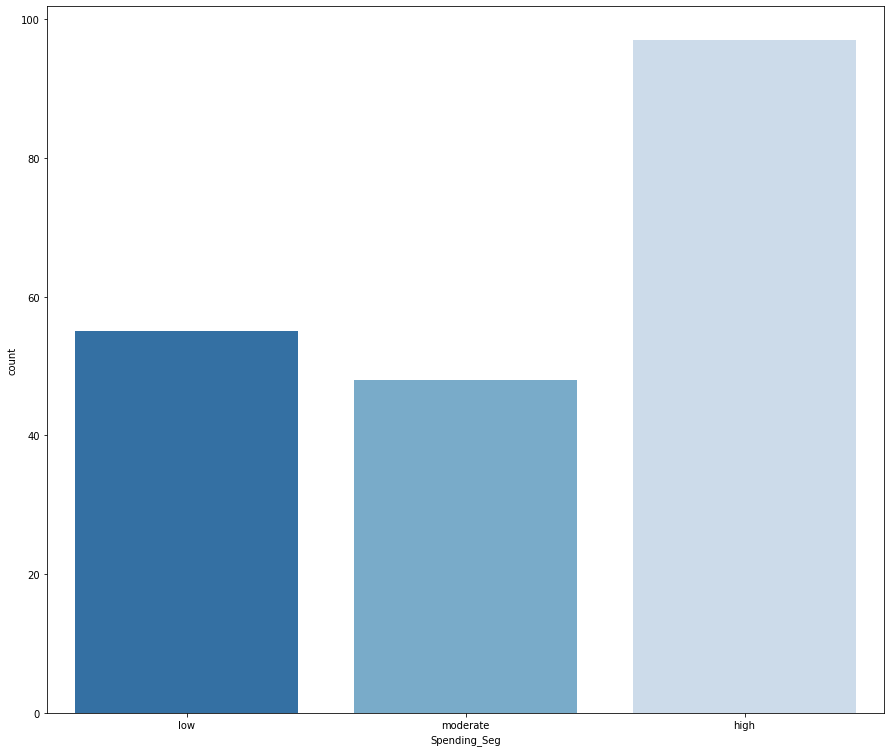

In [22]:
plt.figure(figsize=(15,13))
plt.figure(figsize=(15,13))
sns.countplot(df.Spending_Seg,palette = 'Blues_r' )


Close to 100 people have a spending score higher than 50 points(50% of the total observations of 200 samples), Olders are much conservative in spending their money!

In [23]:
df[['Spending Score', 'Spending_Seg']].sample (10)

,Spending Score,Spending_Seg
59,46,moderate
146,36,moderate
125,77,high
41,92,high
163,93,high
116,43,moderate
53,60,high
141,93,high
75,54,high
72,49,moderate


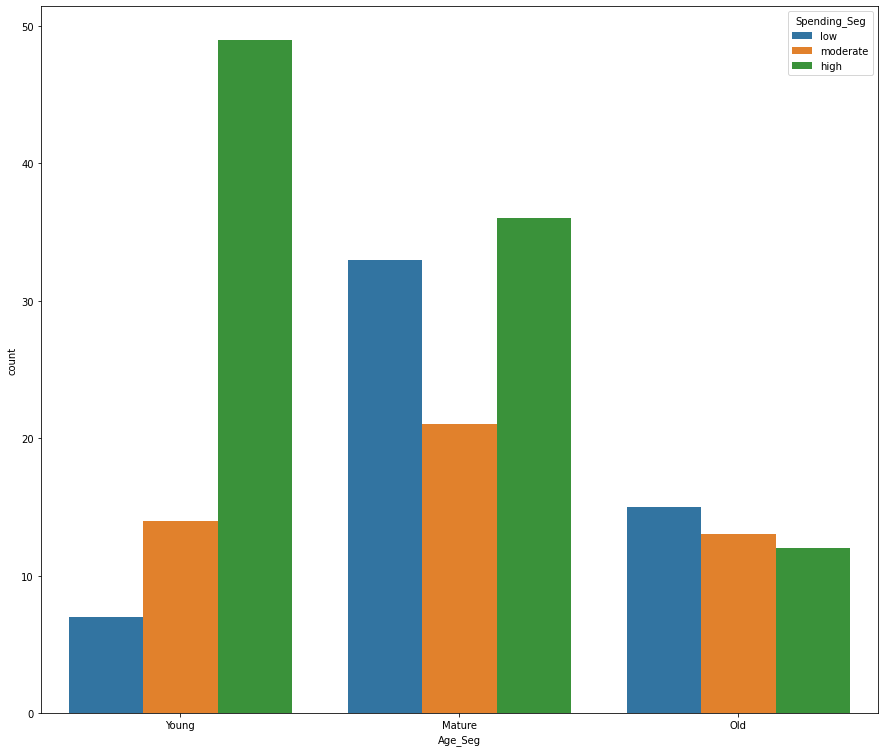

In [24]:
plt.figure(figsize=(15,13))
sns.countplot (df.Age_Seg, hue=df.Spending_Seg)

It seems that the younger , the more their spending score...

In [25]:
print('The percentage of old customer with high spending score out of total number of old customer is : ',(len(df[(df['Age_Seg'] == 'Old')&(df['Spending_Seg']=='high')])/len(df['Age_Seg'] == 'Old'))*100,'%')

The percentage of old customer with high spending score out of total number of old customer is :  6.0 %


In [26]:
print('The percentage of mature customer with high spending score out of the total number of mature customer is : ',(len(df[(df['Age_Seg'] == 'Mature')&(df['Spending_Seg']=='high')])/len(df['Age_Seg'] == 'Mature'))*100,'%')

The percentage of mature customer with high spending score out of the total number of mature customer is :  18.0 %


In [27]:
print('The percentage of young customer with high spending score out of the total number of young customer is : ',(len(df[(df['Age_Seg'] == 'Young')&(df['Spending_Seg']=='high')])/len(df['Age_Seg'] == 'Young'))*100,'%')

The percentage of young customer with high spending score out of the total number of young customer is :  24.5 %



As it's appear in the above graph youngs and matures tend to spend more.

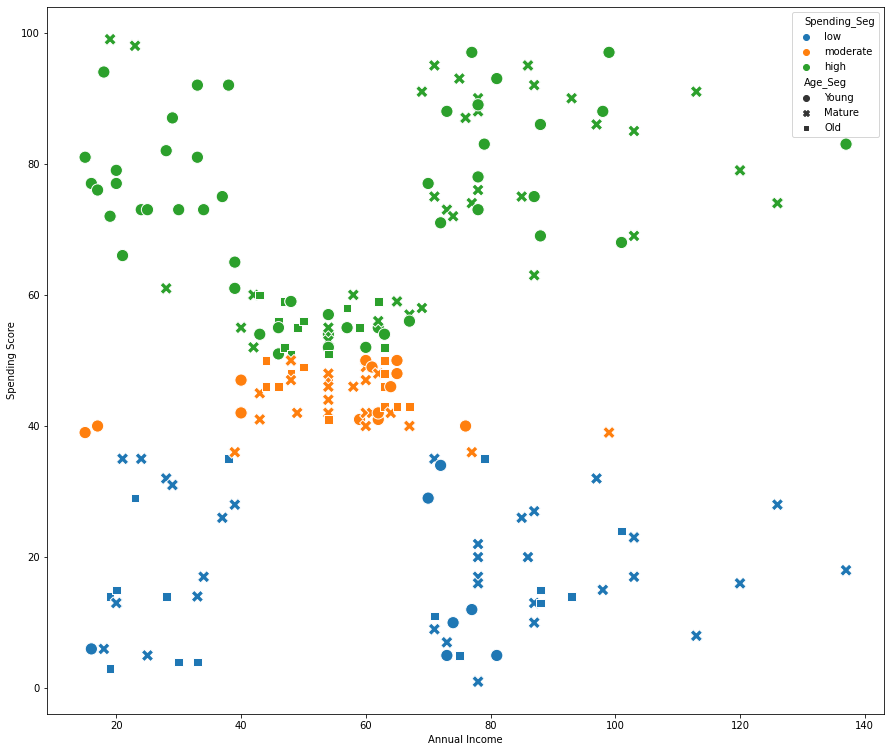

In [28]:
plt.figure(figsize=(15,13))
sns.scatterplot (df['Annual Income'], df['Spending Score'], hue= df.Spending_Seg, style = df.Age_Seg,s =150)

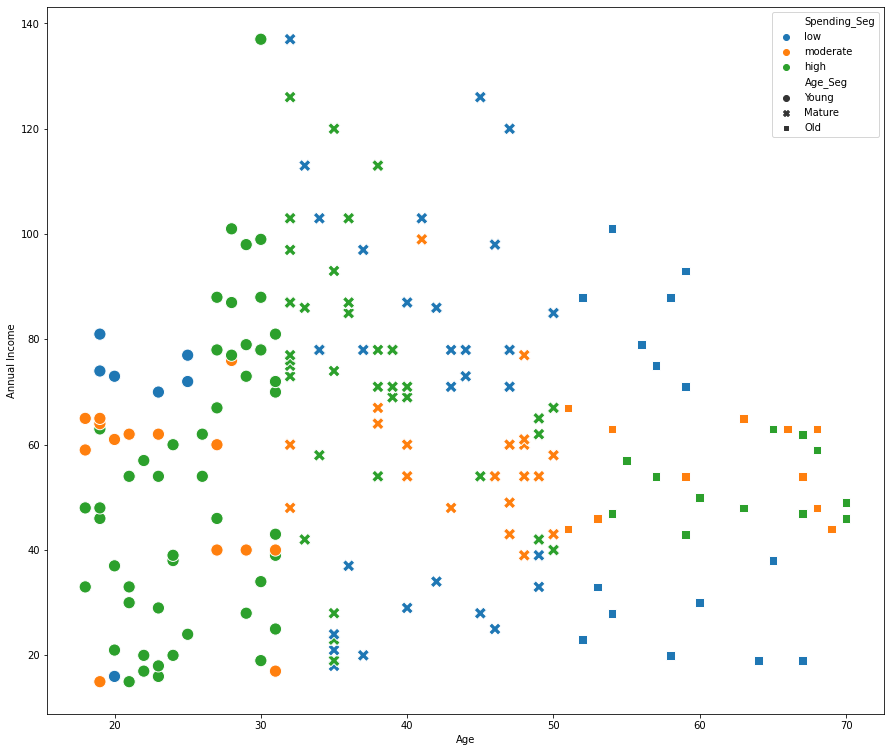

In [30]:
plt.figure(figsize=(15,13))
sns.scatterplot (df.Age,df['Annual Income'], hue = df.Spending_Seg , style = df['Age_Seg'],s =150)
plt.legend (loc='upper right')

Customers whom their ages range between 30-40 generally have the highest spending score. 

In [31]:
df['Annual Income'].describe()

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: Annual Income, dtype: float64

In [32]:
bins = [14,41,78,138]
labels = ['LowIn','MiddleIn' ,'HighIn' ]
df['AnnualIn_seg'] = pd.cut(df['Annual Income'], bins, labels =labels)

In [33]:
df['AnnualIn_seg'].value_counts()

MiddleIn    110
LowIn        50
HighIn       40
Name: AnnualIn_seg, dtype: int64

In [34]:
df['AnnualIn_seg'].isna().sum()

0

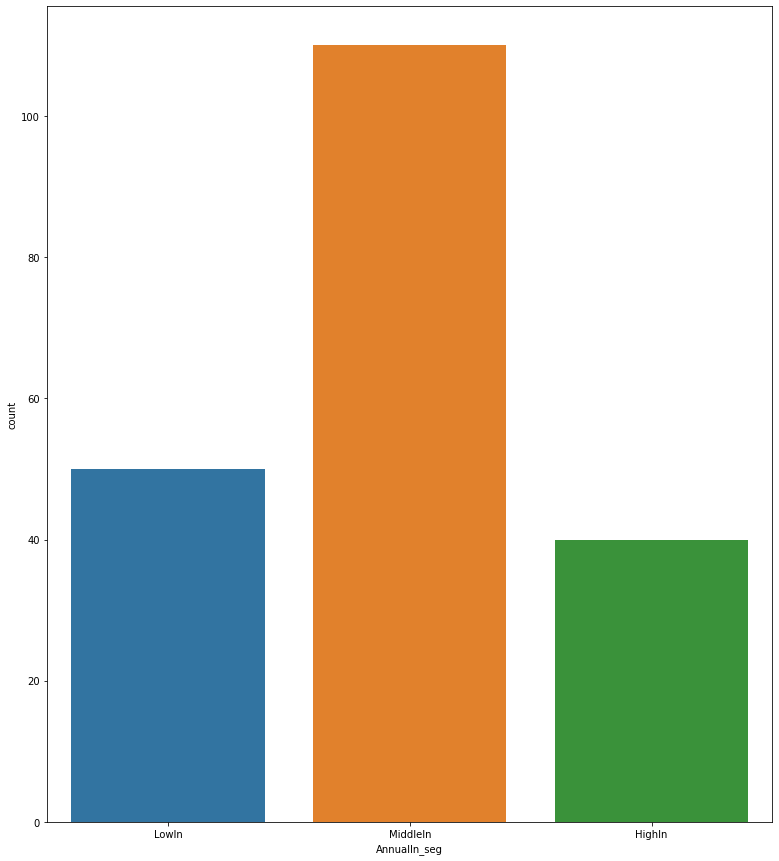

In [35]:
plt.figure(figsize=(13,15))
sns.countplot (df.AnnualIn_seg)

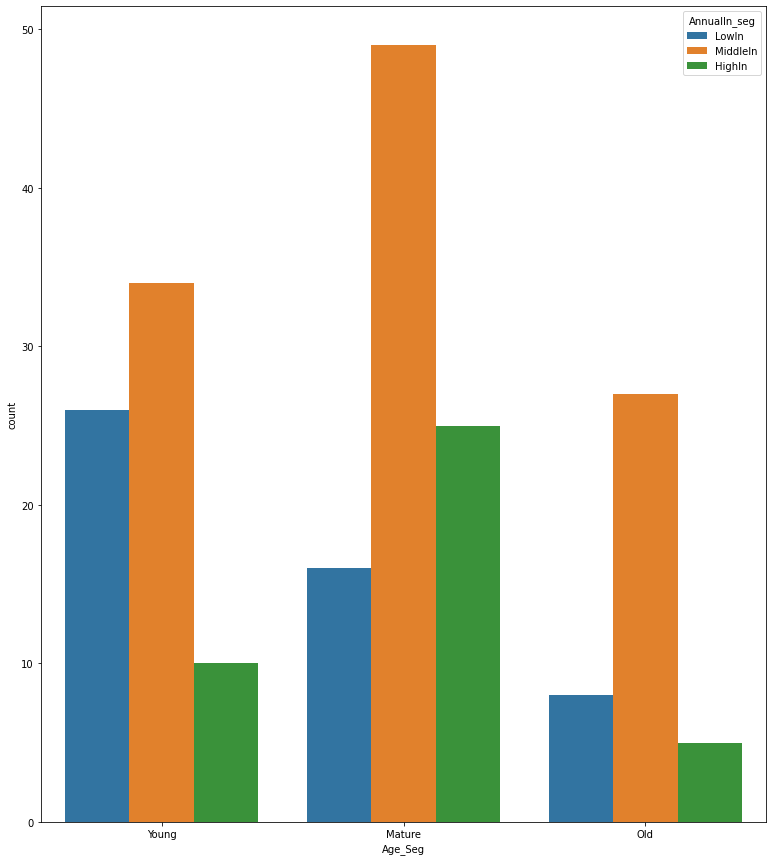

In [36]:
plt.figure(figsize=(13,15))
sns.countplot (df.Age_Seg, hue =df.AnnualIn_seg)


Despite the fact that young customers spend more, but they don't have the highest annual income among other categories, apparently matures are, as they likely to be a current employees in contrast with elders who are likely retired or the youngest which they likely to be students.

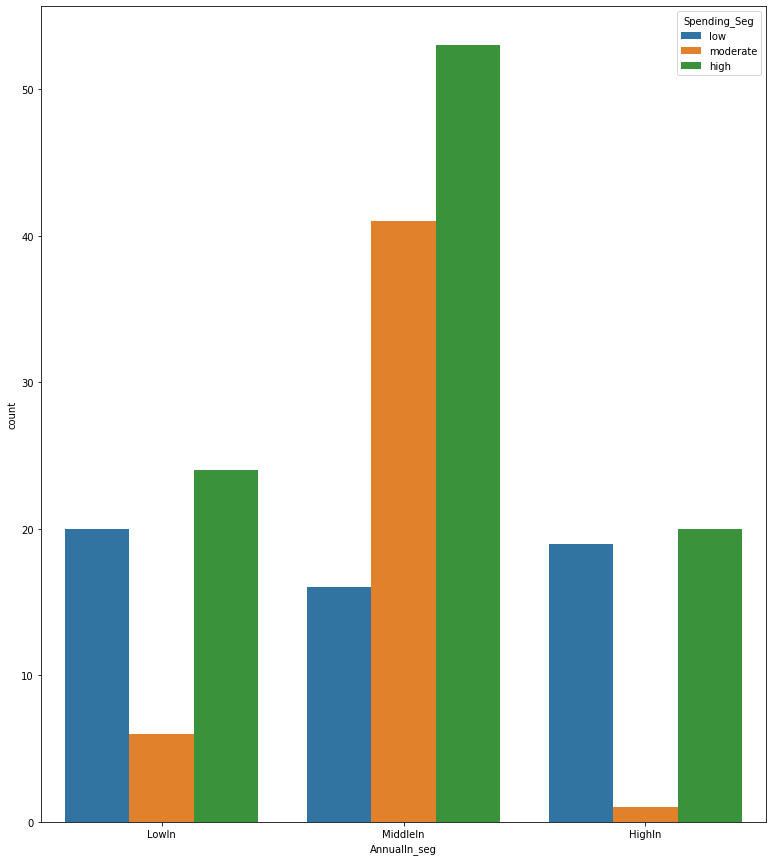

In [37]:
plt.figure(figsize=(13,15))
plt.title=('How ')
sns.countplot (df.AnnualIn_seg, hue = df.Spending_Seg)

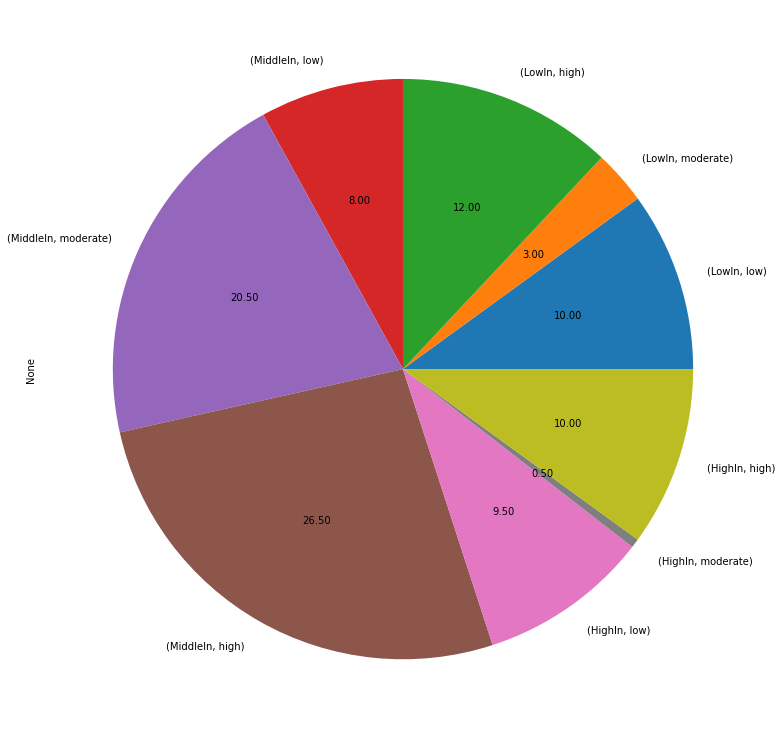

In [70]:
plt.figure(figsize=(13,15))
df.groupby(['AnnualIn_seg', 'Spending_Seg'] ).size().plot(kind='pie', autopct='%.2f')

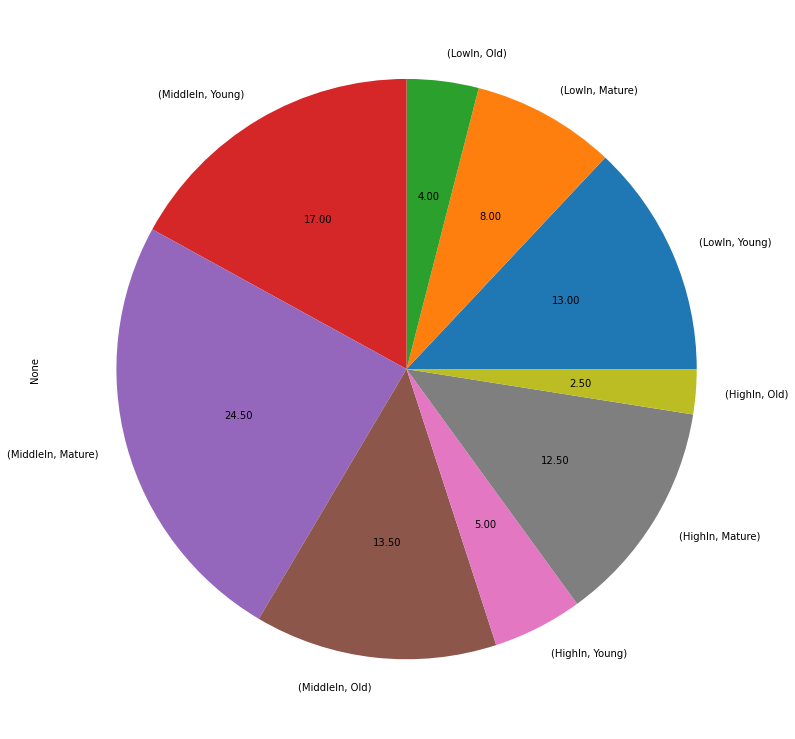

In [42]:
plt.figure(figsize=(13,15))
df.groupby(['AnnualIn_seg', 'Age_Seg'] ).size().plot(kind='pie', autopct='%.2f')



**Using elbow method to decide the proper cluster numbers.** For more details check the [documentation](https://www.scikit-yb.org/en/latest/api/cluster/elbow.html#:~:text=The%20elbow%20method%20runs%20k,point%20to%20its%20assigned%20center.).


In [48]:
k_rng = range(1, 10)
sse = []
for k in k_rng:
 km = KMeans (n_clusters = k)
 km.fit(df[['Annual Income', 'Spending Score']])
 sse.append(km.inertia_)

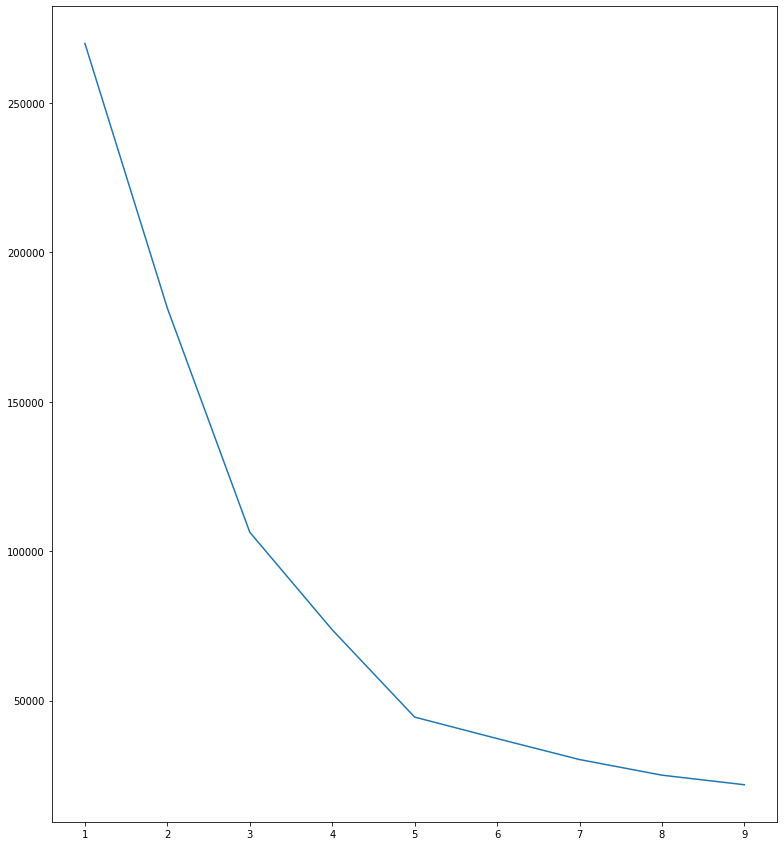

In [49]:
plt.figure(figsize=(13,15))
plt.xlabel =('K')
plt.ylabel= ('SSM')
plt.plot(k_rng, sse)

In [50]:
km = KMeans (n_clusters = 5)

In [51]:
y_predicted = km.fit_predict(df[['Annual Income','Spending Score' ]])

In [52]:
df['cluster'] = y_predicted

In [53]:
km.cluster_centers_

array([[86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [55.2962963 , 49.51851852],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571]])

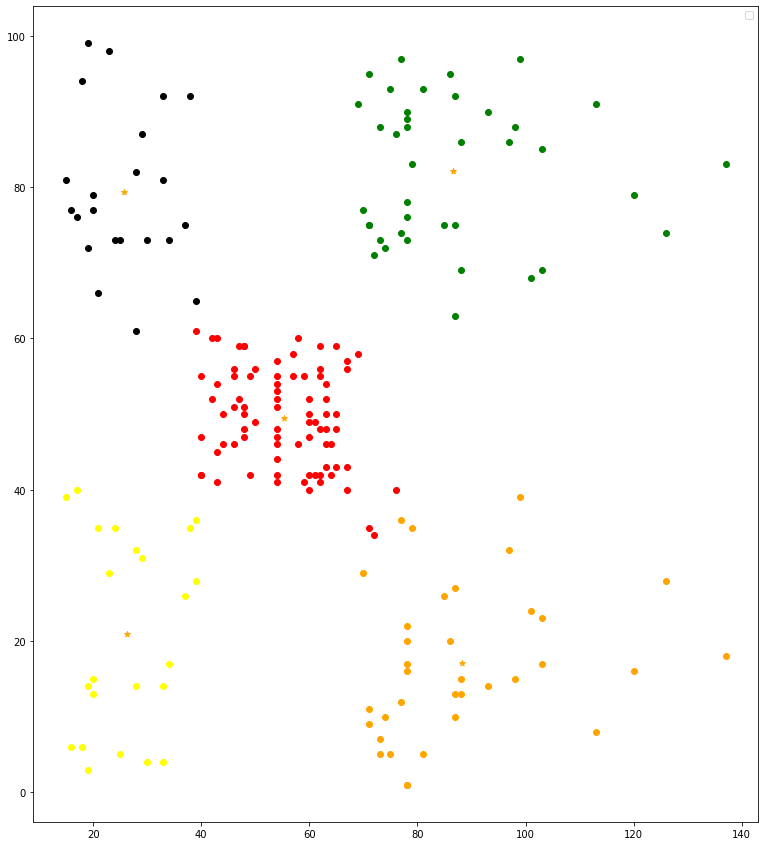

In [54]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster ==2]
df4 = df[df.cluster ==3]
df5 = df[df.cluster ==4]

plt.figure(figsize=(13,15))
plt.scatter (df1['Annual Income'] ,df1['Spending Score'] ,color = 'green')
plt.scatter (df2['Annual Income'] ,df2['Spending Score'],color = 'black')
plt.scatter (df3['Annual Income'] ,df3['Spending Score'],color = 'red')
plt.scatter (df4['Annual Income'] ,df4['Spending Score'],color = 'yellow')
plt.scatter (df5['Annual Income'] ,df5['Spending Score'],color = 'orange')
plt.scatter (km.cluster_centers_[:, 0],km.cluster_centers_[:, 1], color = 'orange', marker = '*' )

plt.xlabel = ('Annual Income')
plt.ylabel =('Spending Score')
plt.legend ()
plt.show()

In [55]:

k_rng = range(1, 10)
sse = []
for k in k_rng:
 km = KMeans (n_clusters = k)
 km.fit(df[['Age', 'Spending Score']])
 sse.append(km.inertia_)

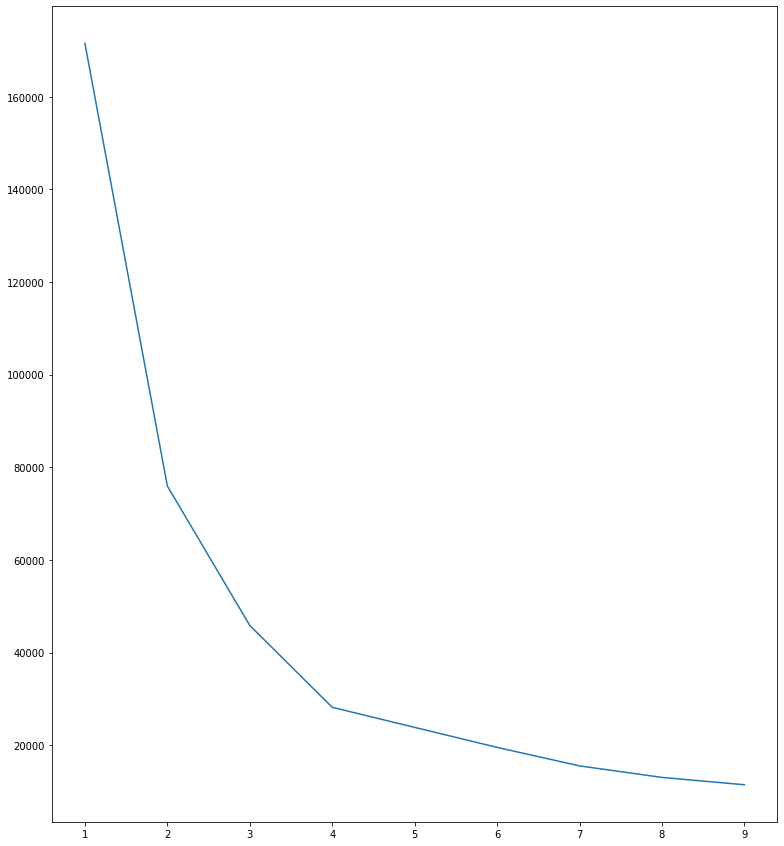

In [56]:
plt.figure(figsize=(13,15))
plt.xlabel =('K')
plt.ylabel= ('SSM')
plt.plot(k_rng, sse)

In [57]:
km2 = KMeans (n_clusters = 4)

In [58]:
y_predicted2 = km2.fit_predict(df[['Age','Spending Score' ]])

In [59]:
df['cluster2'] = y_predicted2

In [60]:
from mpl_toolkits.mplot3d import Axes3D

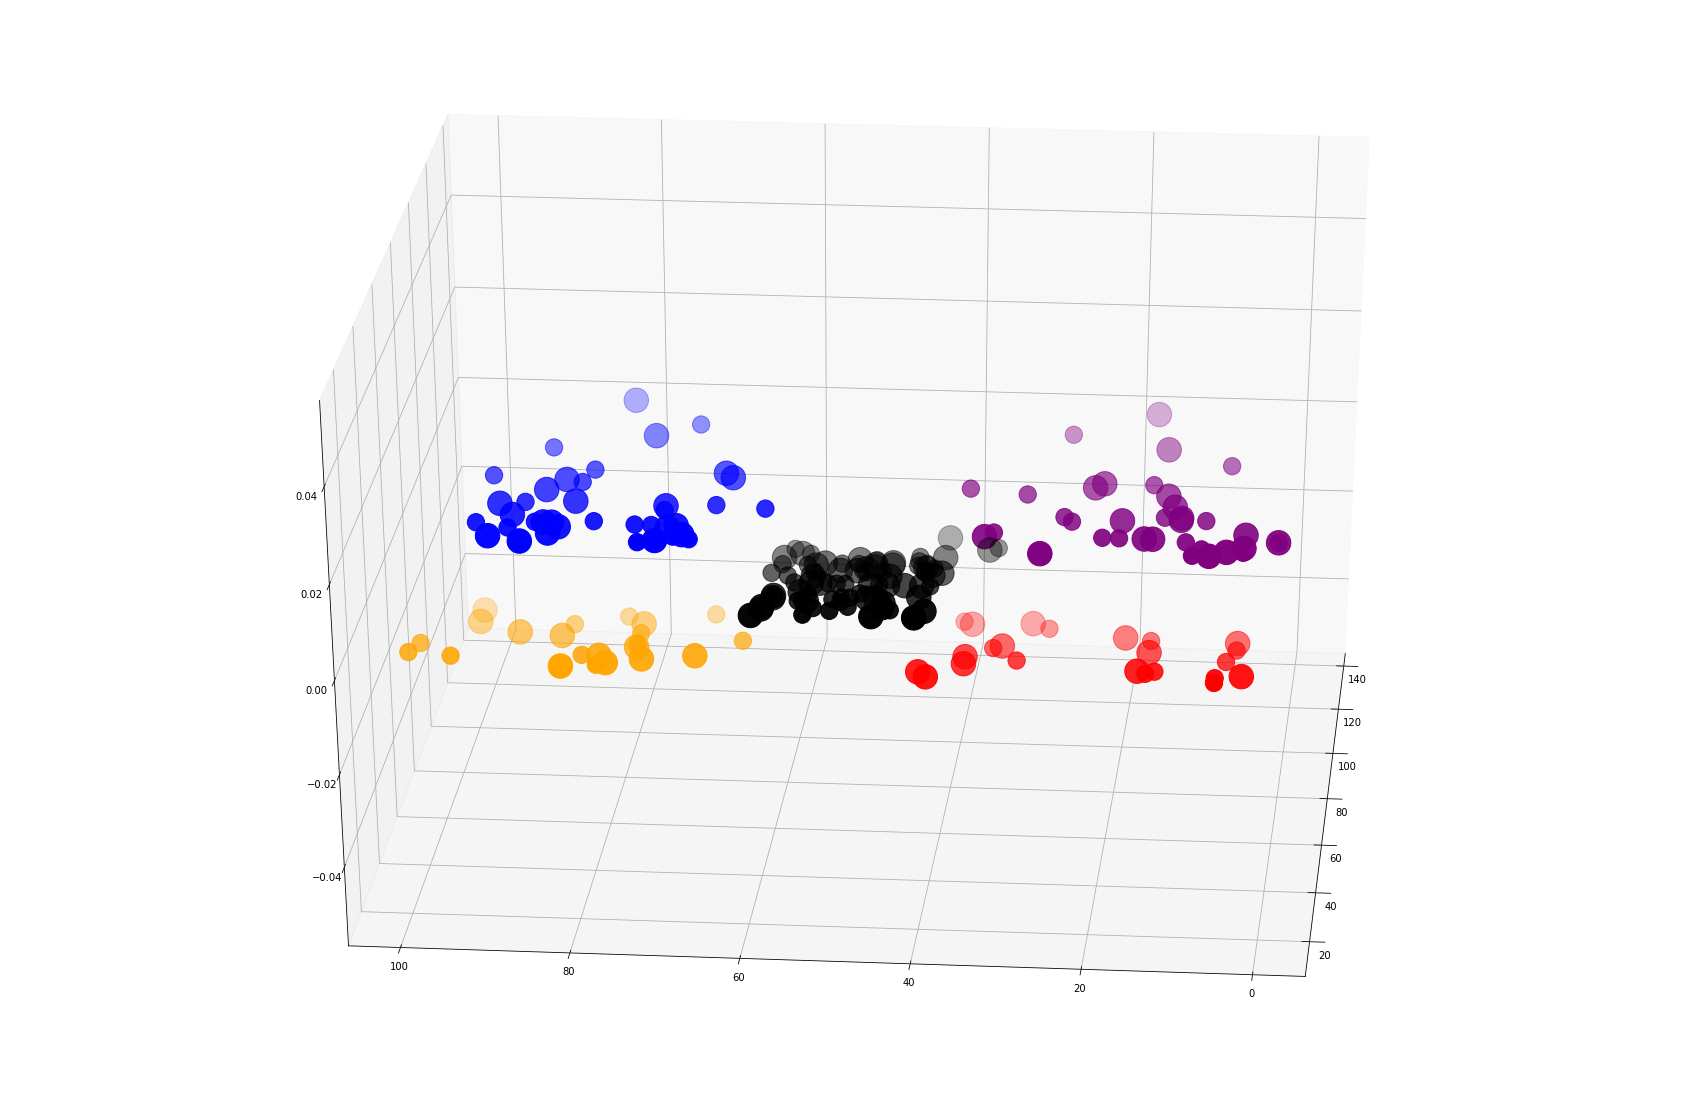

In [61]:
fig = plt.figure (figsize =(30, 20))
ax = fig.add_subplot(111,projection = '3d')
plt.title =('Clustering based on Annual Income and Spending Score')
ax.scatter(df['Annual Income'] [df.cluster ==0], df['Spending Score'] [df.cluster ==0],sizes=(600,300) , c ='blue')
ax.scatter(df['Annual Income'] [df.cluster ==1], df['Spending Score'] [df.cluster ==1],sizes=(600,300), c ='orange')
ax.scatter(df['Annual Income'] [df.cluster ==2], df['Spending Score'] [df.cluster ==2],sizes=(600,300), c ='black')
ax.scatter(df['Annual Income'] [df.cluster ==3], df['Spending Score'] [df.cluster ==3],sizes=(600,300), c ='red')
ax.scatter (df['Annual Income'] [df.cluster ==4],df['Spending Score'] [df.cluster ==4], sizes =(600, 300),c ='purple') 
plt.xlabel =('Annual Income')
plt.ylabel =('Spending Score')
ax.view_init(30,185)
plt.show ()

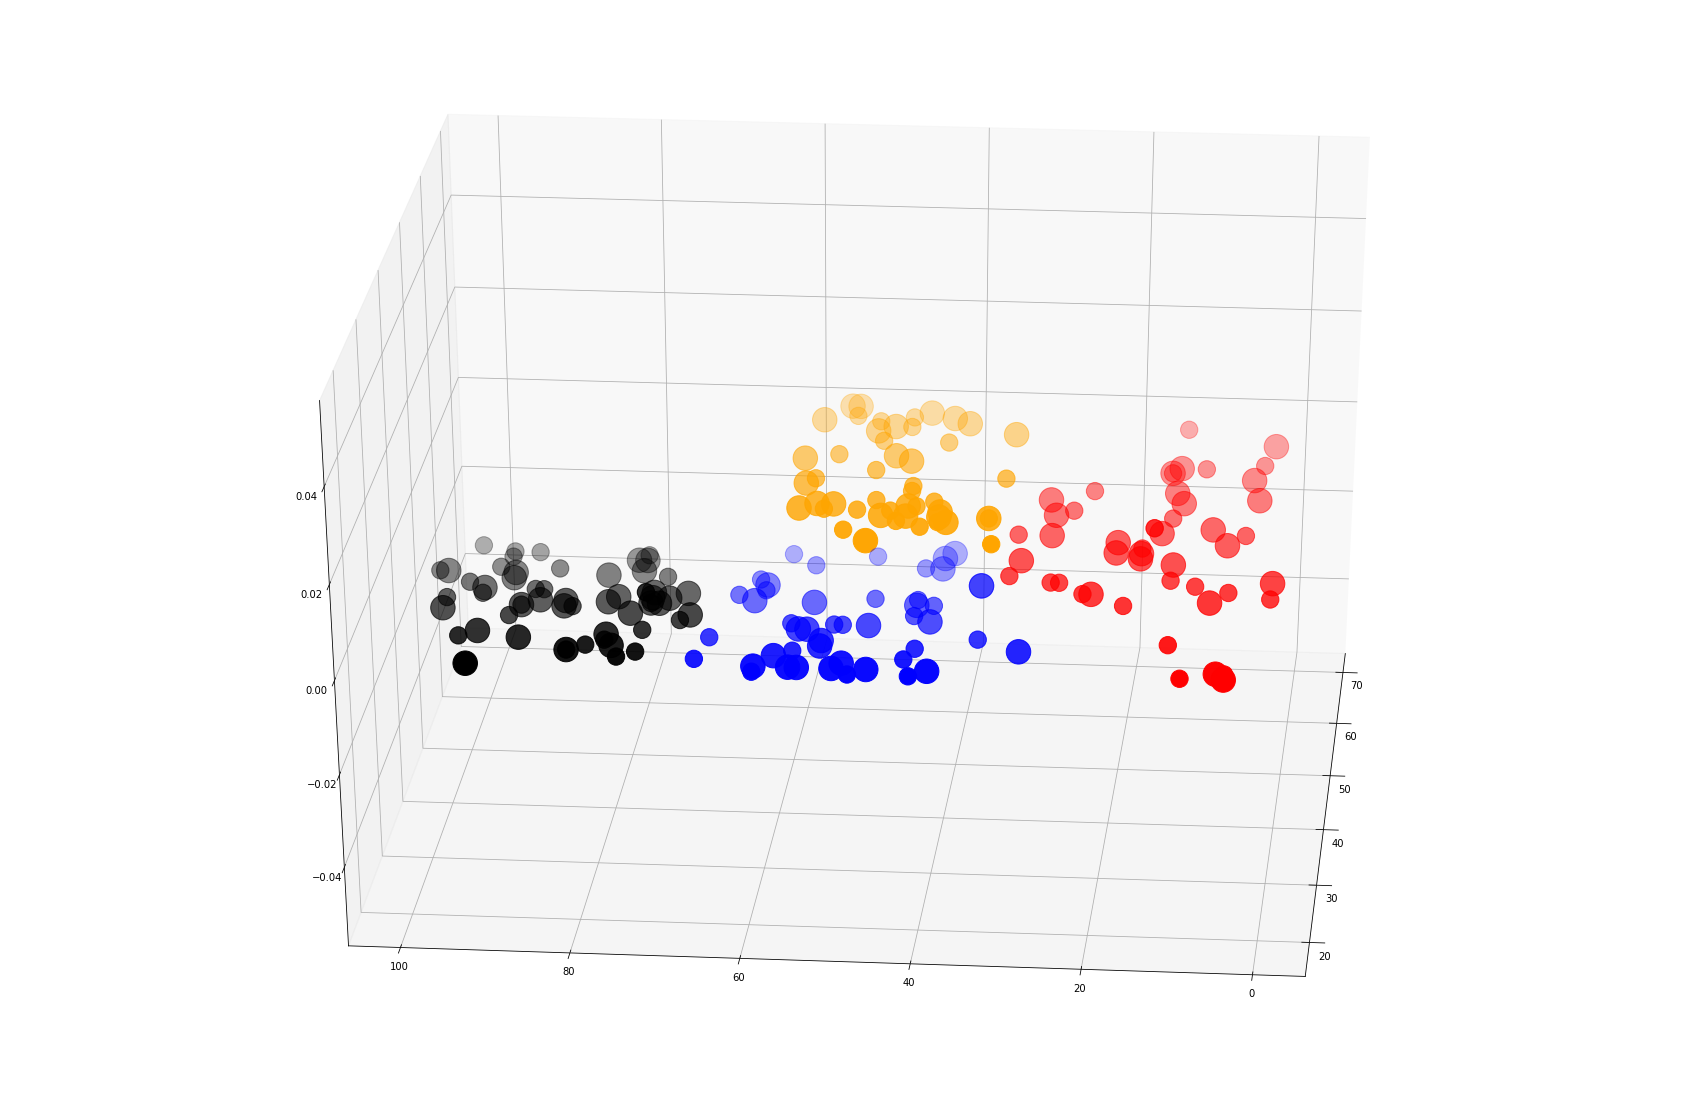

In [62]:
fig = plt.figure (figsize =(30, 20))
ax = fig.add_subplot(111,projection = '3d')
ax.scatter(df.Age [df.cluster2 ==0], df['Spending Score'] [df.cluster2 ==0], sizes=(600,300), c ='blue')
ax.scatter(df.Age [df.cluster2 ==1], df['Spending Score'] [df.cluster2 ==1],sizes=(600,300), c ='orange')
ax.scatter(df.Age [df.cluster2 ==2], df['Spending Score'] [df.cluster2 ==2],sizes=(600,300), c ='black')
ax.scatter(df.Age [df.cluster2 ==3], df['Spending Score'] [df.cluster2 ==3],sizes=(600,300), c ='red')
plt.xlabel= ('Age')
plt.ylabel=('Spending Score')
ax.view_init(30,185)

plt.show ()

In [63]:
k_rng = range(1, 10)
sse = []
for k in k_rng:
 km = KMeans (n_clusters = k)
 km.fit(df[['Age', 'Annual Income']])
 sse.append(km.inertia_)

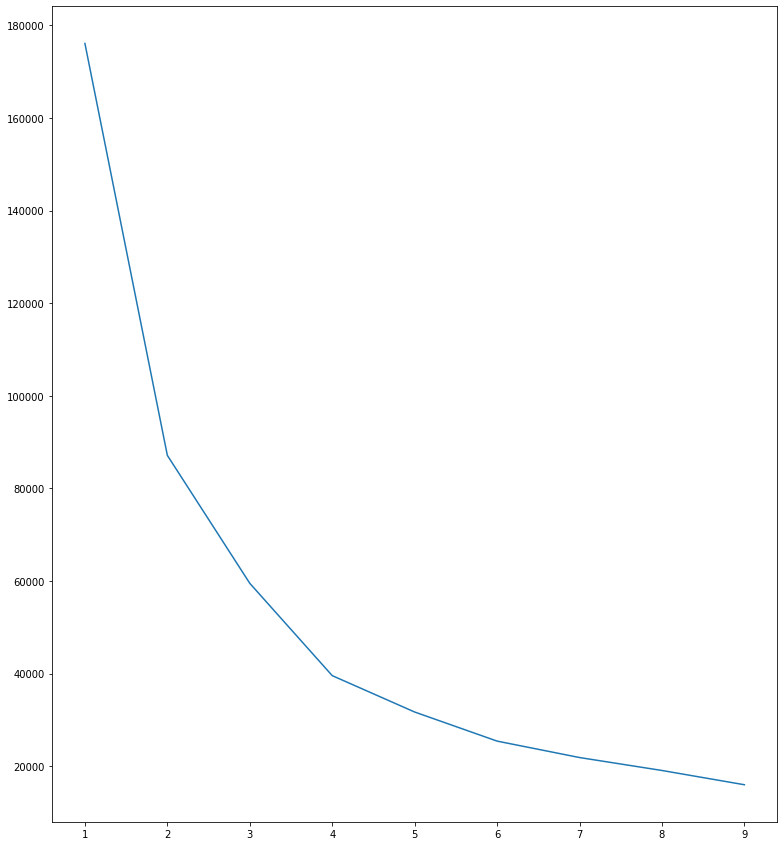

In [64]:
plt.figure(figsize=(13,15))
plt.xlabel =('K')
plt.ylabel= ('SSM')
plt.plot(k_rng, sse)

In [65]:
km3 = KMeans (n_clusters = 4)

In [66]:
y_predicted3 = km3.fit_predict(df[['Age','Annual Income' ]])

In [67]:
df['cluster3'] = y_predicted3

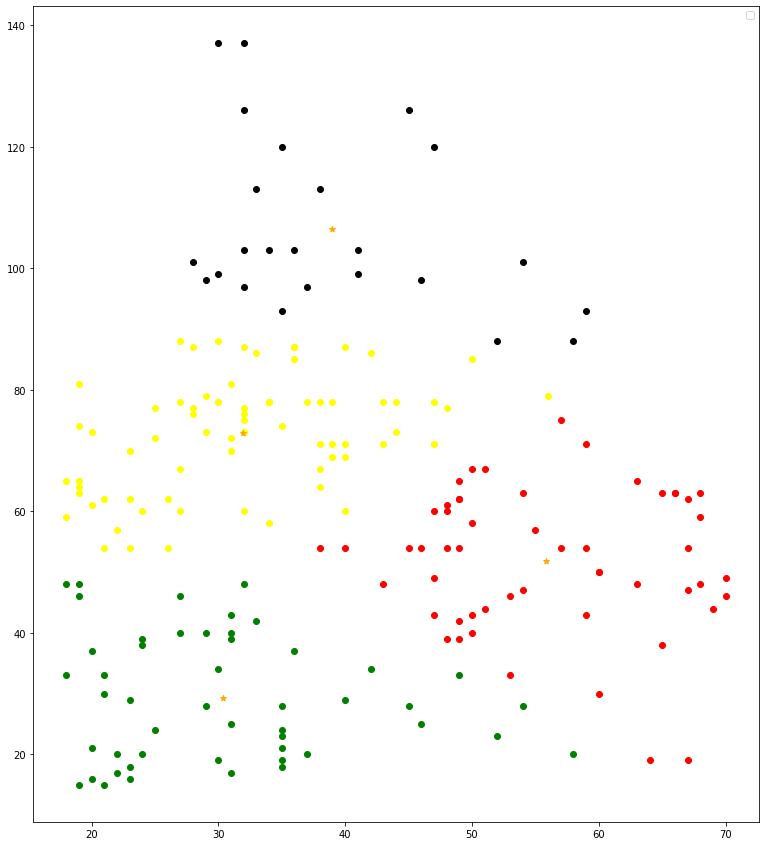

In [68]:
df1 = df[df.cluster3==0]
df2 = df[df.cluster3==1]
df3 = df[df.cluster3 ==2]
df4 = df[df.cluster3 ==3]

plt.figure(figsize=(13,15))
plt.scatter (df1['Age'] ,df1['Annual Income'] ,color = 'green')
plt.scatter (df2['Age'] ,df2['Annual Income'],color = 'black')
plt.scatter (df3['Age'] ,df3['Annual Income'],color = 'red')
plt.scatter (df4['Age'] ,df4['Annual Income'],color = 'yellow')
plt.scatter (km3.cluster_centers_[:, 0],km3.cluster_centers_[:, 1], color = 'orange', marker = '*' )

plt.xlabel = ('Age')
plt.ylabel =('Annual Income')
plt.legend ()
plt.show()

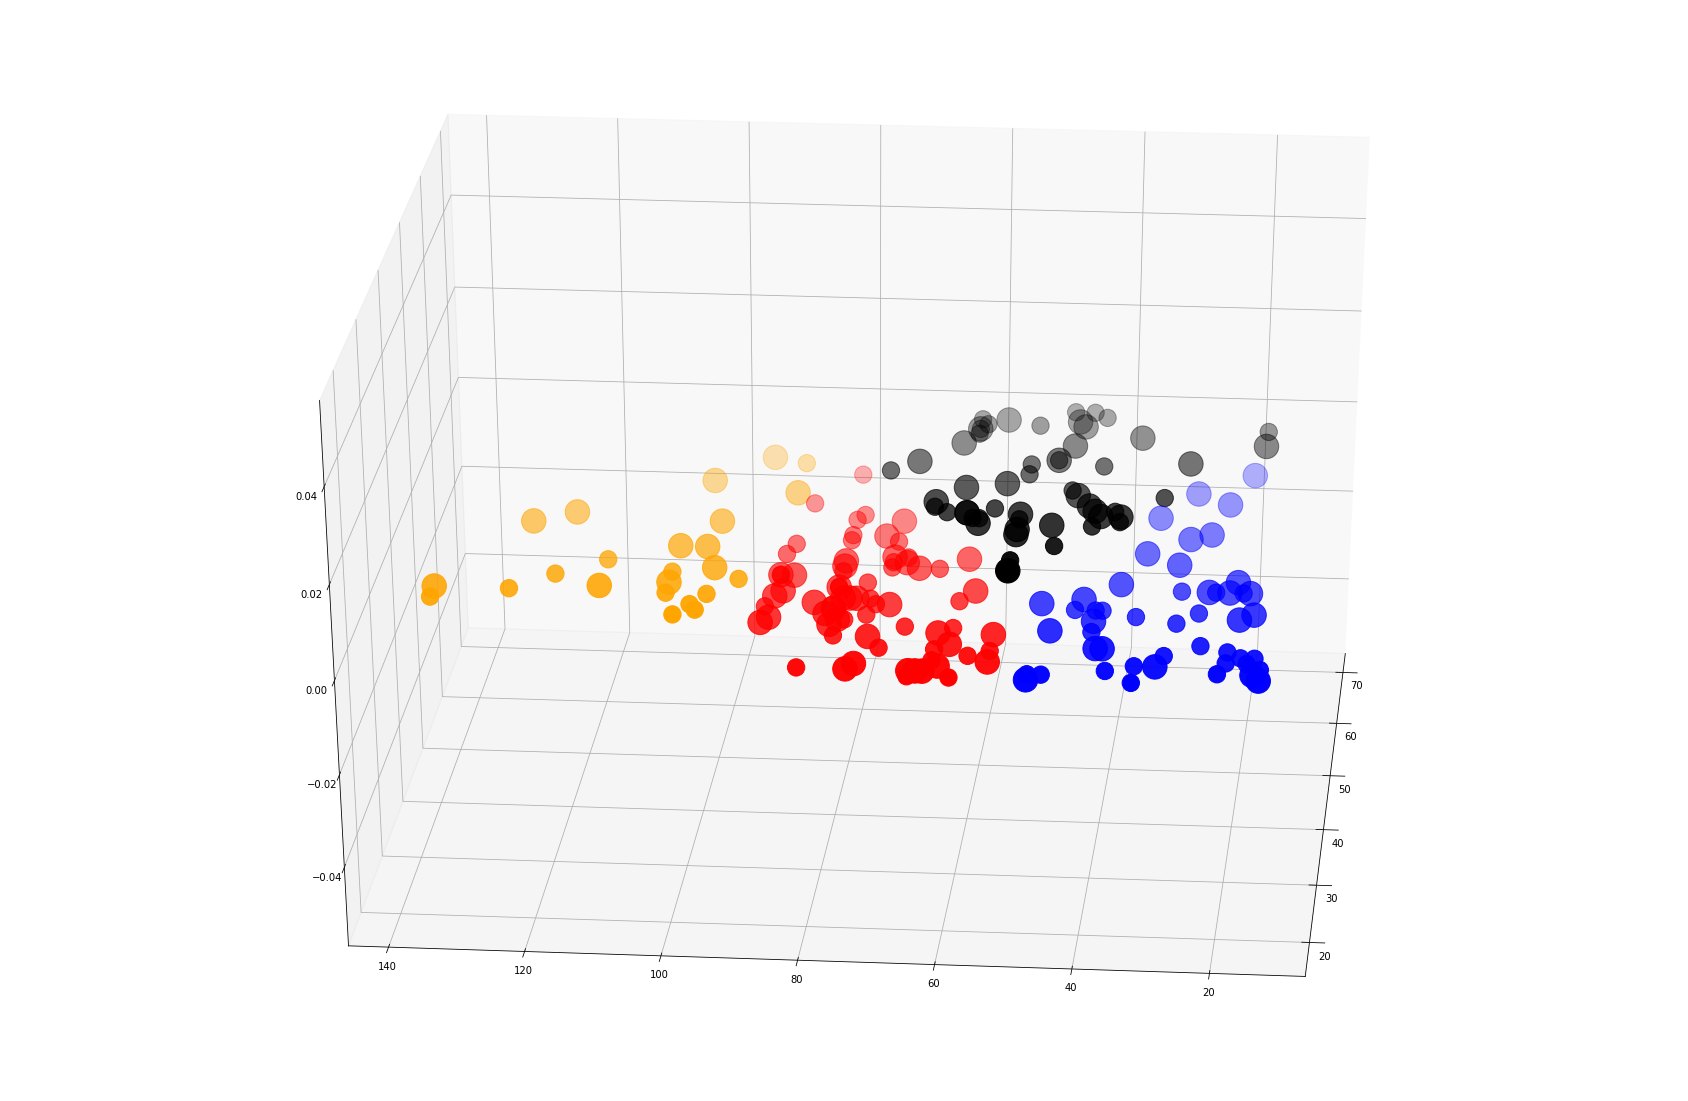

In [69]:
fig = plt.figure (figsize =(30, 20))
ax = fig.add_subplot(111,projection = '3d')
ax.scatter(df.Age [df.cluster3 ==0], df['Annual Income' ] [df.cluster3 ==0], sizes=(600,300), c ='blue')
ax.scatter(df.Age [df.cluster3 ==1], df['Annual Income'] [df.cluster3 ==1],sizes=(600,300), c ='orange')
ax.scatter(df.Age [df.cluster3 ==2], df['Annual Income'] [df.cluster3 ==2],sizes=(600,300), c ='black')
ax.scatter(df.Age [df.cluster3 ==3], df['Annual Income'] [df.cluster3 ==3],sizes=(600,300), c ='red')
plt.xlabel= ('Age')
plt.ylabel=('Annual Income')
ax.view_init(30,185)

plt.show ()